In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from tqdm import tqdm
import pandas as pd
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# [Synthetic Calcium Imaging Dataset](https://zenodo.org/records/6254739)
This dataset comes from the training and validation open resources of *DeepCAD-RT*. 

Please download and extract it into `dataset/zenodo/synthetic` using:
```sh
wget https://zenodo.org/api/records/6254739/files-archive
unzip files-archive
rm files-archive
```

In [37]:
x_paths = sorted(
    [_ for _ in  DATASETS["synthetic"].dir.glob("*.tif") if "clean" not in _.stem],
    key=lambda _: float(_.stem.split("_")[-2].split("dBSNR")[0]),
)
cprint(*[f"rand:{_.stem}" for _ in x_paths], sep="\n")

noise_1Q_-5.52dBSNR_490x490x6000
noise_2Q_-2.51dBSNR_490x490x6000
noise_4Q_0.48dBSNR_490x490x6000
noise_7Q_2.88dBSNR_490x490x6000
noise_12Q_5.17dBSNR_490x490x6000
noise_20Q_7.31dBSNR_490x490x6000
noise_40Q_10.14dBSNR_490x490x6000
noise_75Q_12.56dBSNR_490x490x6000
noise_150Q_14.98dBSNR_490x490x6000
noise_375Q_17.56dBSNR_490x490x6000


In [39]:
y_path = DATASETS["synthetic"].dir / "clean_30Hz_490x490x6000.tif"
y = Recording(y_path, max_frames=1).np
xs = {
    f.stem[:-13]: Recording(f, max_frames=1).np
    for f in x_paths
}

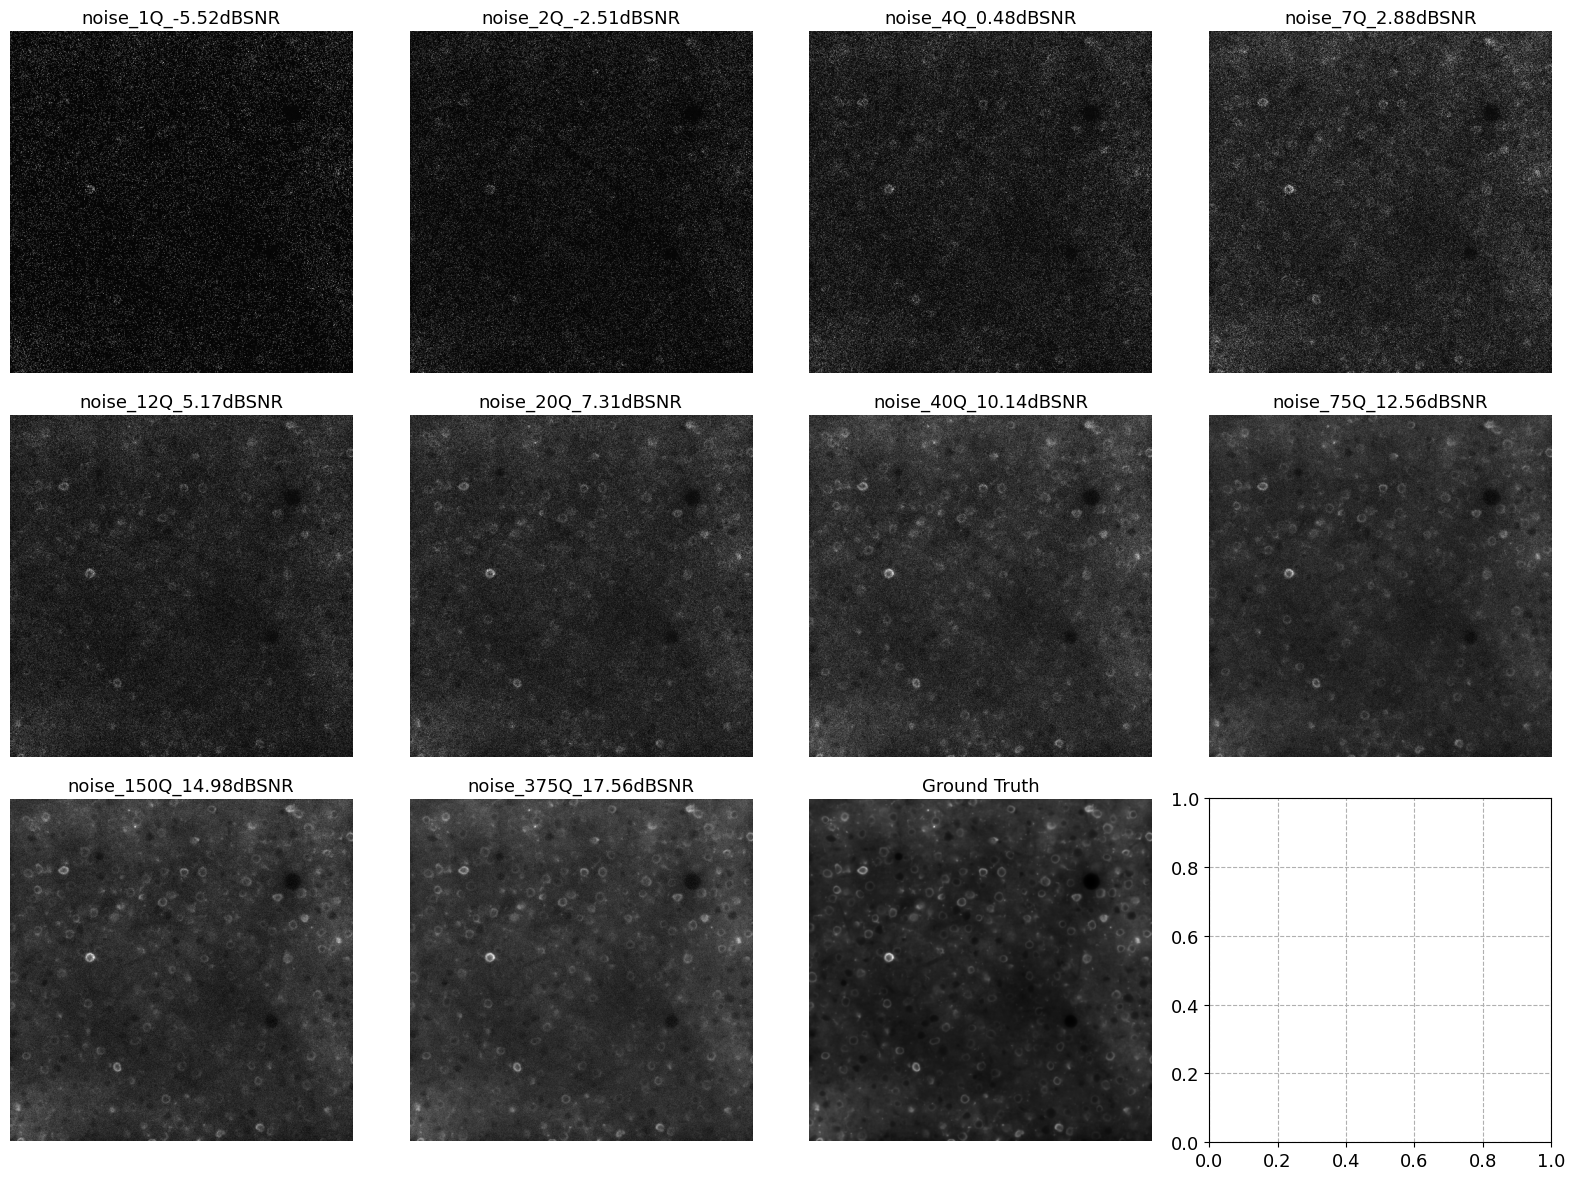

In [41]:
imshow({**xs, "Ground Truth": y},cols=4)